# Modeling

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [2]:
plants = pd.read_csv('../data/data_cleaned/plants.csv')

In [3]:
plants.head()

,id,created_utc,title,self_text,comments,score,upvote_ratio,subreddit
0,uw3f46,1.653321e+09,I feel attacked.,no_text,793,63651,0.94,1
1,v4z9xu,1.654380e+09,The liberals are trying to make my plants gay!!,no_text,1281,54217,0.82,1
2,q0hqvn,1.633268e+09,This was supposed to be a plant progress post ...,no_text,572,45198,0.96,1
3,i5rplr,1.596855e+09,My grandpa made me a plant stand 💖,no_text,451,40218,0.96,1
4,lkjvss,1.613414e+09,I let my Golden Pothos get outta hand for just...,no_text,593,39723,0.98,1


In [4]:
plants.shape

(9271, 8)

In [5]:
X = plants['title']
y = plants['subreddit']

In [6]:
X.shape

(9271,)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

In [8]:
X_train.shape

(6953,)

In [9]:
cvec = CountVectorizer(
)

In [10]:
cvec.fit(X_train)

CountVectorizer()

In [11]:
X_train_cvec = cvec.transform(X_train)

In [12]:
cvec.get_feature_names_out()

array(['00', '000', '00pm', ..., 'zuccini', 'zuchini', 'zz'], dtype=object)

In [13]:
X_train_cvec

<6953x6459 sparse matrix of type '<class 'numpy.int64'>'
	with 62426 stored elements in Compressed Sparse Row format>

In [14]:
X_train_df = pd.DataFrame(X_train_cvec.todense(), columns=cvec.get_feature_names_out())

In [15]:
X_train_df.head()

,00,000,00pm,10,100,1000l,1000w,100lbs,1030pm,10a,...,zinnias,zombie,zone,zone7b,zone8a,zoom,zucchini,zuccini,zuchini,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

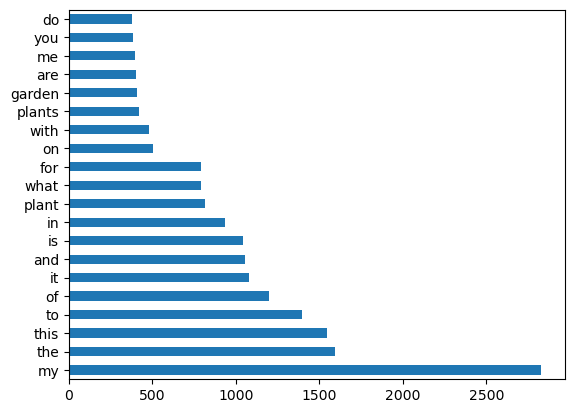

In [16]:
X_train_df.sum().sort_values(ascending=False).head(20).plot(kind='barh')

In [17]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('et', ExtraTreesClassifier())
])

In [18]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer()), ('et', ExtraTreesClassifier())])

In [19]:
pipe.score(X_train, y_train)

0.9953976700704732

In [20]:
pipe.score(X_test, y_test)

0.8412424503882657

In [21]:
1 - y.mean()

0.4891597454427785

In [22]:
pipe.get_params()

{'memory': None,
 'steps': [('cvec', CountVectorizer()), ('et', ExtraTreesClassifier())],
 'verbose': False,
 'cvec': CountVectorizer(),
 'et': ExtraTreesClassifier(),
 'cvec__analyzer': 'word',
 'cvec__binary': False,
 'cvec__decode_error': 'strict',
 'cvec__dtype': numpy.int64,
 'cvec__encoding': 'utf-8',
 'cvec__input': 'content',
 'cvec__lowercase': True,
 'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__preprocessor': None,
 'cvec__stop_words': None,
 'cvec__strip_accents': None,
 'cvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cvec__tokenizer': None,
 'cvec__vocabulary': None,
 'et__bootstrap': False,
 'et__ccp_alpha': 0.0,
 'et__class_weight': None,
 'et__criterion': 'gini',
 'et__max_depth': None,
 'et__max_features': 'sqrt',
 'et__max_leaf_nodes': None,
 'et__max_samples': None,
 'et__min_impurity_decrease': 0.0,
 'et__min_samples_leaf': 1,
 'et__min_samples_split': 2,
 'et__min_weight_fraction_leaf': 0.0,
 'et__n_estima

In [23]:
pipe_params = {
    'et__n_estimators': [100, 500],
    'et__max_features': ['sqrt'],
    'et__max_depth': [None],
    'et__min_samples_leaf': [1],
    'et__bootstrap': [True, False],
    'et__oob_score': [True],
    'cvec__max_features': [None, 3_000, 5_000],
    'cvec__min_df': [1, 2, 3],
    'cvec__max_df': [.9, 1],
    'cvec__ngram_range': [(1,1), (1, 2)],
    'cvec__stop_words': [None, 'english']
}

In [24]:
gs = GridSearchCV(pipe,
                  param_grid = pipe_params,
                  cv = 5,
                  n_jobs=8
)

In [25]:
%%time
gs.fit(X_train, y_train)

/Users/nolan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
960 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nolan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nolan/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/nolan/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 4

CPU times: user 2min 56s, sys: 2min 30s, total: 5min 26s
Wall time: 29min 33s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('et', ExtraTreesClassifier())]),
             n_jobs=8,
             param_grid={'cvec__max_df': [0.9, 1],
                         'cvec__max_features': [None, 3000, 5000],
                         'cvec__min_df': [1, 2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english'],
                         'et__bootstrap': [True, False],
                         'et__max_depth': [None], 'et__max_features': ['sqrt'],
                         'et__min_samples_leaf': [1],
                         'et__n_estimators': [100, 500],
                         'et__oob_score': [True]})

In [26]:
gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': None,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None,
 'et__bootstrap': True,
 'et__max_depth': None,
 'et__max_features': 'sqrt',
 'et__min_samples_leaf': 1,
 'et__n_estimators': 500,
 'et__oob_score': True}

In [27]:
gs.score(X_train, y_train)

0.9928088594851143

In [28]:
gs.score(X_test, y_test)

0.8403796376186368

In [29]:
preds = gs.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

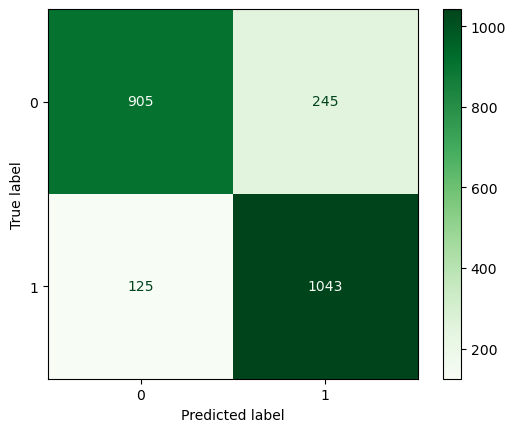

In [30]:
ConfusionMatrixDisplay.from_estimator(gs, X_test, y_test, cmap='Greens');

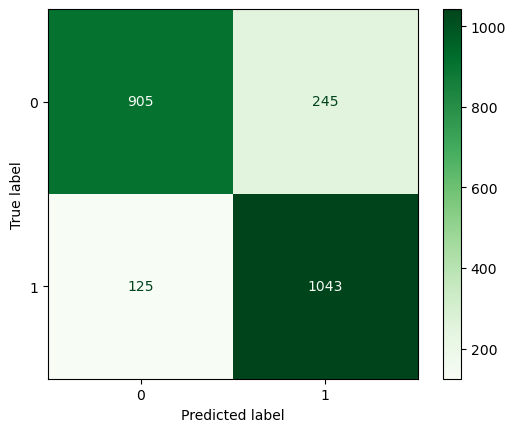

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, preds, cmap='Greens');

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds, digits = 5))

              precision    recall  f1-score   support

           0    0.87864   0.78696   0.83028      1150
           1    0.80978   0.89298   0.84935      1168

    accuracy                        0.84038      2318
   macro avg    0.84421   0.83997   0.83981      2318
weighted avg    0.84394   0.84038   0.83989      2318



In [33]:
misclassified_indices = (preds != y_test)

In [34]:
misclassified_indices

5799    False
3599     True
4819    False
966     False
448     False
        ...  
4215    False
4852     True
4618    False
1474    False
6695     True
Name: subreddit, Length: 2318, dtype: bool

In [35]:
misclassified_df = pd.DataFrame({
    'Misclassified_Posts': X_test[misclassified_indices],
    'True Labels': y_test[misclassified_indices],
    'Predicted_Labels': preds[misclassified_indices]
})

In [36]:
misclassified_df.head(50)

,Misclassified_Posts,True Labels,Predicted_Labels
3599,Any idea what this is ?,1,0
4847,Update on my Ohio pineapple,0,1
6600,so proud of my babies...,0,1
5622,ain’t stupid if it works,0,1
5030,Thought this sub would appreciate this post,0,1
5202,Before and after. Really proud.,0,1
6682,"I just started to learn to prune, how is it ? ...",0,1
5713,Social distancing in my safe room.,0,1
8511,What plant is this and how do I overwinter it ...,0,1
5385,"Oh well, one day maybe",0,1
